In [1]:
import pandas as pd

In [2]:
all_df = pd.read_csv('../data/GeneralDatensatz18-21ohneGeo.csv', sep=';')
all_df.sample(3)

,OBJECTID,LAND,BEZ,LOR_ab_2021,UJAHR,UMONAT,USTUNDE,UWOCHENTAG,UKATEGORIE,UART,UTYP1,ULICHTVERH,IstRad,IstPKW,IstFuss,IstKrad,IstGkfz,IstSonstige,USTRZUSTAND
49393,207910,11,1,1100308.0,2018,11,20,4,3,2,6,0,0,1,0,0,0,0,0
41535,200052,11,1,1100313.0,2018,5,9,4,3,5,3,0,1,1,0,0,0,0,0
26601,192827,11,9,9051701.0,2019,3,15,3,3,5,3,2,1,1,0,0,0,0,0


In [3]:
agg_df = all_df.groupby(["UJAHR","UMONAT"]).agg("size") 

In [4]:
agg_df.head()

UJAHR  UMONAT
2018   1          884
       2          730
       3          802
       4         1217
       5         1462
dtype: int64

In [5]:
len(agg_df)

48

In [6]:
agg_df.index

MultiIndex([(2018,  1),
            (2018,  2),
            (2018,  3),
            (2018,  4),
            (2018,  5),
            (2018,  6),
            (2018,  7),
            (2018,  8),
            (2018,  9),
            (2018, 10),
            (2018, 11),
            (2018, 12),
            (2019,  1),
            (2019,  2),
            (2019,  3),
            (2019,  4),
            (2019,  5),
            (2019,  6),
            (2019,  7),
            (2019,  8),
            (2019,  9),
            (2019, 10),
            (2019, 11),
            (2019, 12),
            (2020,  1),
            (2020,  2),
            (2020,  3),
            (2020,  4),
            (2020,  5),
            (2020,  6),
            (2020,  7),
            (2020,  8),
            (2020,  9),
            (2020, 10),
            (2020, 11),
            (2020, 12),
            (2021,  1),
            (2021,  2),
            (2021,  3),
            (2021,  4),
            (2021,  5),
            (202

In [7]:
agg_df = agg_df.reset_index()

In [8]:
agg_df.head()

,UJAHR,UMONAT,0
0,2018,1,884
1,2018,2,730
2,2018,3,802
3,2018,4,1217
4,2018,5,1462


In [9]:
agg_df.columns = ["year", "month", "count"]

In [10]:
agg_df.head()

,year,month,count
0,2018,1,884
1,2018,2,730
2,2018,3,802
3,2018,4,1217
4,2018,5,1462


In [11]:
agg_df["date"] = pd.to_datetime(agg_df[["year", "month"]].assign(day=1))

In [12]:
agg_df.head()

,year,month,count,date
0,2018,1,884,2018-01-01
1,2018,2,730,2018-02-01
2,2018,3,802,2018-03-01
3,2018,4,1217,2018-04-01
4,2018,5,1462,2018-05-01


In [13]:
agg_df = agg_df.sort_values("date")

In [14]:
agg_df.head()

,year,month,count,date
0,2018,1,884,2018-01-01
1,2018,2,730,2018-02-01
2,2018,3,802,2018-03-01
3,2018,4,1217,2018-04-01
4,2018,5,1462,2018-05-01


In [15]:
%matplotlib inline
import matplotlib.pyplot as plt

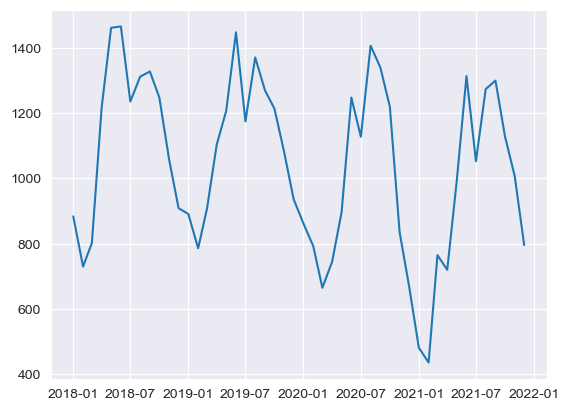

In [16]:
plt.plot(agg_df["date"], agg_df["count"])

In [17]:
plt.show()